In [1]:
import gym
import numpy as np
import matplotlib

from collections import defaultdict
import plotting

matplotlib.style.use('ggplot')

In [2]:
env= gym.make('Blackjack-v0')

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    returns_sum= defaultdict(float)
    returns_count =defaultdict(float)
    
    V=defaultdict(float)
    
    for i in range(num_episodes):
        
        state=env.reset()
        n_iter=100
        total_reward=0
        episode=[]
        
        for k in range(n_iter): #n_iterations :this can be changed as infinite loop)
            episode.append(state)
            action=sample_policy(state)
            next_state, reward, done, _ = env.step(action)
            total_reward += reward * (discount_factor ** k)
            if done:
                break
            state=next_state
        
        for _state in episode:
            returns_count[_state] += 1
            #returns_sum[_state] += 0
            returns_sum[_state] += (total_reward - returns_sum[_state])/returns_count[_state]
        
    V= returns_sum
    
    return V     

In [4]:
def sample_policy(observation):
    #Action=0 means stick, action=1 means hit
    score, dealer_score, usable_ace = observation
    return 0 if score >=20 else 1

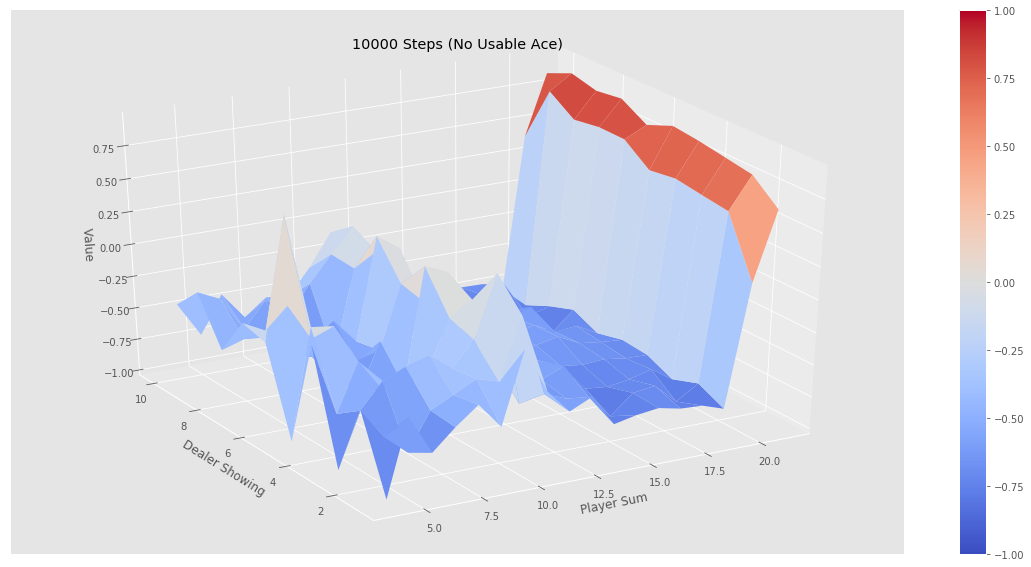

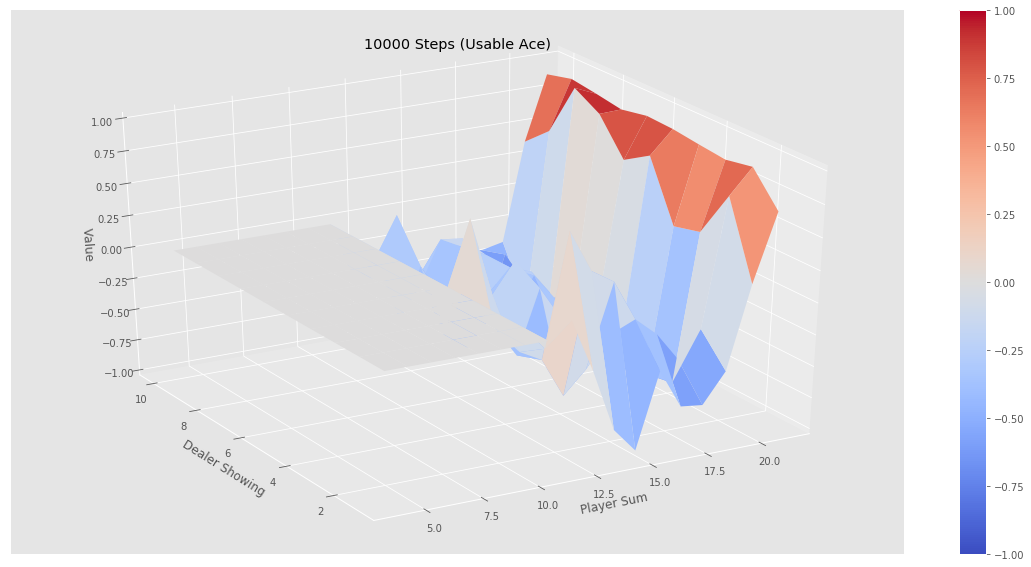

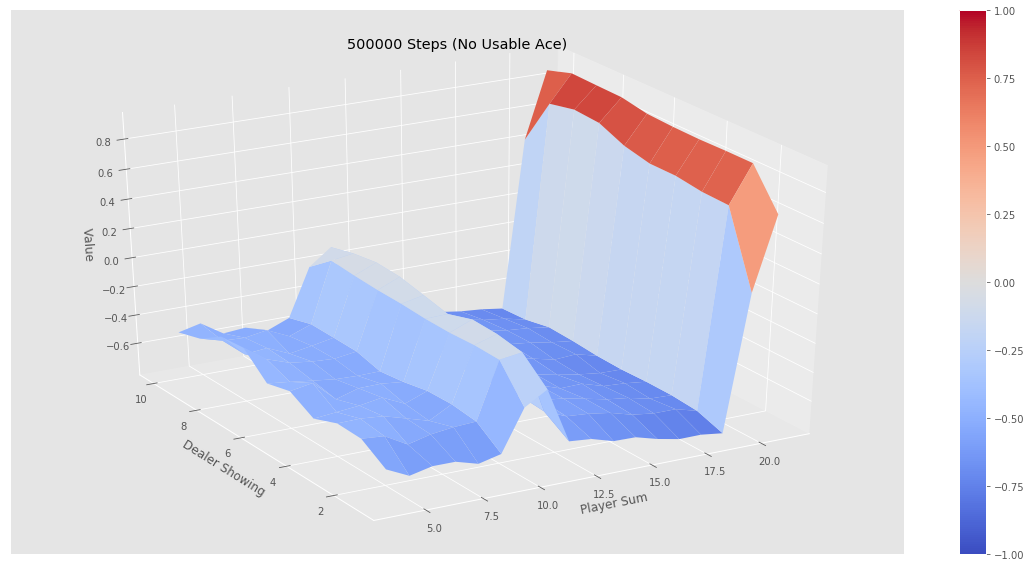

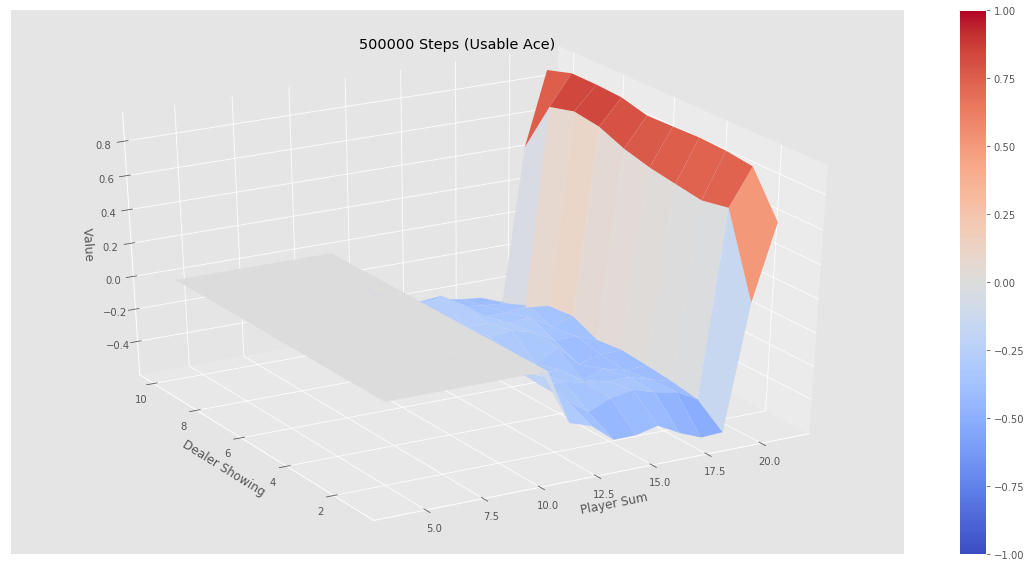

In [5]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
#print(V_10k)
plotting.plot_value_function(V_10k, title="10000 Steps")
V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
#print(V_500k)
plotting.plot_value_function(V_500k, title="500000 Steps")

In [7]:
print(env.action_space.n)

2


# Comments and Important points regarding this algorithm code

## 1) defaultdict 

https://docs.python.org/3/library/collections.html#collections.defaultdict

details to defaultdict

## 2) Prone mistake that could have happened in the code

Now the problem that i faced in this type of program is how will the program identify which states to update and which to not as there is no unique sample data left

#### a) np.arrange()

#### b) np.meshgrid()